In [49]:
!pip install -Uqq fastbook

In [50]:
import fastbook

import warnings 
warnings.filterwarnings('ignore')

In [51]:
from fastbook import *

In [52]:
from zipfile import ZipFile
file_name = "/content/headtrauma.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [53]:
path = Path('/content/headtrauma')

In [54]:
Object_types = 'no','yes' # two types of category 

In [55]:
Object_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

#The most important parameter valid_pct=0.2. 
#This hold out 20% of the data.
#This 20% of the data is called the validation set;
#the remaining 80% is called the training set.
#seed=42 means same validation set every time 
#so if accuracy improve means model improve not because of data

In [56]:
dls = Object_types.dataloaders(path)

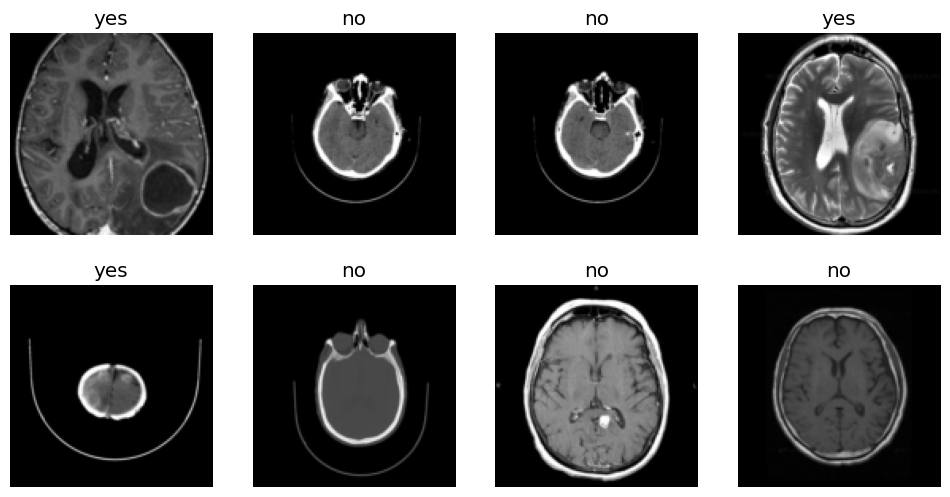

In [57]:
dls.valid.show_batch(max_n=8, nrows=2)

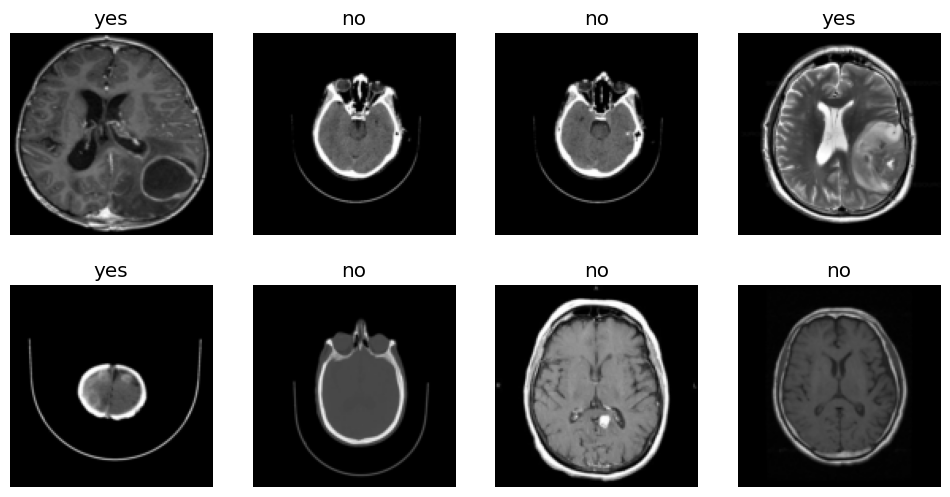

In [58]:
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Object_types.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

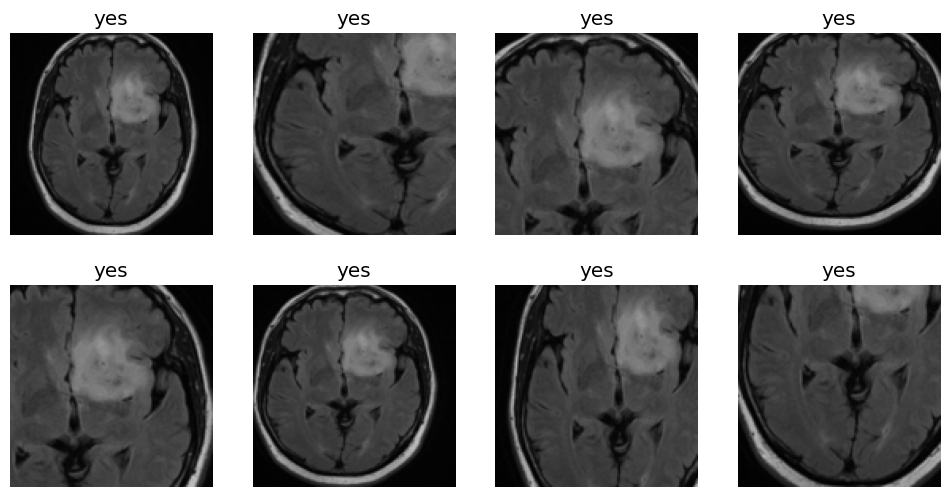

In [59]:
Object_types = Object_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# cropmethod avoid the overfitting 

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
learn1.fine_tune(10)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(4, nrows=1)

In [ ]:
from fastai.vision.widgets import *

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/headtrauma/no/N (13).jpg')

In [ ]:
learn_inf.predict('/content/headtrauma/yes/Y (266).jpg')

In [ ]:
learn_inf.dls.vocab

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
btn_upload = SimpleNamespace(data = ['/content/headtrauma/no/N (13).jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
VBox([widgets.Label('Select your image!'),
      btn_upload, btn_run, out_pl, lbl_pred])